In [1]:
#https://data.mendeley.com/datasets/5y9wdsg2zt/1 (data)
import os, shutil

In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_pos_dir = '/home/rongzhen/chalmers/digital_twin/crack_image/Positive'
original_dataset_neg_dir = '/home/rongzhen/chalmers/digital_twin/crack_image/Negative'

# The directory where we will
# store our smaller dataset
base_dir = '/home/rongzhen/chalmers/digital_twin/crack_image/CNN_GPU'
if os.path.exists(base_dir):
  os.system("rm -rf {}".format(base_dir))
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training posive pictures
train_pos_dir = os.path.join(train_dir, 'pos')
os.mkdir(train_pos_dir)

# Directory with our training negative pictures
train_neg_dir = os.path.join(train_dir, 'neg')
os.mkdir(train_neg_dir)

# Directory with our validation positive pictures
validation_pos_dir = os.path.join(validation_dir, 'pos')
os.mkdir(validation_pos_dir)

# Directory with our validation negative pictures
validation_neg_dir = os.path.join(validation_dir, 'neg')
os.mkdir(validation_neg_dir)

# Directory with our validation positive pictures
test_pos_dir = os.path.join(test_dir, 'pos')
os.mkdir(test_pos_dir)

# Directory with our validation negative pictures
test_neg_dir = os.path.join(test_dir, 'neg')
os.mkdir(test_neg_dir)

In [3]:
# change file name such as 10000_1.jpg to 10000.jpg
for f in os.listdir(original_dataset_pos_dir):
    fname_split = f.split("_")
    if len(fname_split)!=1:
        src = os.path.join(original_dataset_pos_dir,f)
        dst = os.path.join(original_dataset_pos_dir,fname_split[0]+'.jpg')
        os.rename(src, dst) 

for f in os.listdir(original_dataset_neg_dir):
    fname_split = f.split("_")
    if len(fname_split)!=1:
        src = os.path.join(original_dataset_neg_dir,f)
        dst = os.path.join(original_dataset_neg_dir,fname_split[0]+'.jpg')
        os.rename(src, dst) 

# Note: may need to shuffle the images then copy to train, test, validation

In [4]:
# Copy first 14000 images to train
fnames = ['{0:05}.jpg'.format(i) for i in range(1,14001) ]
for fname in fnames:
    src_pos = os.path.join(original_dataset_pos_dir, fname)
    src_neg = os.path.join(original_dataset_neg_dir, fname)

    dst_pos = os.path.join(train_pos_dir, fname)
    dst_neg = os.path.join(train_neg_dir, fname)

    shutil.copyfile(src_pos, dst_pos)
    shutil.copyfile(src_neg, dst_neg)

# Copy first 4000 images to validation
fnames = ['{0:05}.jpg'.format(i) for i in range(14001,18001) ]
for fname in fnames:
    src_pos = os.path.join(original_dataset_pos_dir, fname)
    src_neg = os.path.join(original_dataset_neg_dir, fname)

    dst_pos = os.path.join(validation_pos_dir, fname)
    dst_neg = os.path.join(validation_neg_dir, fname)

    shutil.copyfile(src_pos, dst_pos)
    shutil.copyfile(src_neg, dst_neg)

    
# Copy first 2000 images to test
fnames = ['{0:05}.jpg'.format(i) for i in range(18001,20001) ]
for fname in fnames:
    src_pos = os.path.join(original_dataset_pos_dir, fname)
    src_neg = os.path.join(original_dataset_neg_dir, fname)

    dst_pos = os.path.join(test_pos_dir, fname)
    dst_neg = os.path.join(test_neg_dir, fname)

    shutil.copyfile(src_pos, dst_pos)
    shutil.copyfile(src_neg, dst_neg)
    
  

In [5]:
print('total training pos images:', len(os.listdir(train_pos_dir)))
print('total training neg images:', len(os.listdir(train_neg_dir)))

('total training pos images:', 14000)
('total training neg images:', 14000)


In [6]:
print('total test pos images:', len(os.listdir(test_pos_dir)))
print('total test neg images:', len(os.listdir(test_neg_dir)))

('total test pos images:', 2000)
('total test neg images:', 2000)


In [7]:
print('total validation pos images:', len(os.listdir(validation_pos_dir)))
print('total validation neg images:', len(os.listdir(validation_neg_dir)))

('total validation pos images:', 4000)
('total validation neg images:', 4000)


In [8]:
from keras import layers
from keras import models
from keras.layers import GlobalAveragePooling2D

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
__________

In [10]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(227, 227),
        batch_size=56,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=40,
        class_mode='binary')

Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [12]:
train_dir

'/home/rongzhen/chalmers/digital_twin/crack_image/CNN_GPU/train'

In [13]:
validation_dir

'/home/rongzhen/chalmers/digital_twin/crack_image/CNN_GPU/validation'

In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

('data batch shape:', (56, 227, 227, 3))
('labels batch shape:', (56,))


In [16]:
#import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True

history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200)

Epoch 1/2
50/50 [==============================] - 56s 1s/step - loss: 0.0513 - acc: 0.9832 - val_loss: 0.0937 - val_acc: 0.9638
Epoch 2/2
50/50 [==============================] - 58s 1s/step - loss: 0.0561 - acc: 0.9796 - val_loss: 0.0560 - val_acc: 0.9888


In [ ]:
#model.save('crack_manual_GAP_gpu.h5')

In [17]:
%matplotlib notebook

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/home/rongzhen/anaconda3/envs/hobby/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# import Numpy, Scipy, and Matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# import Keras's functional api
from keras.models import Model

# get the weights from the last layer
gap_weights = model.layers[-1].get_weights()[0]


In [19]:
gap_weights

array([[-0.16733123],
       [ 0.17919524],
       [-0.12500669],
       [ 0.20044377],
       [ 0.15473993],
       [ 0.18038465],
       [-0.13432369],
       [ 0.14135018],
       [ 0.05589001],
       [ 0.12279436],
       [ 0.21059889],
       [ 0.06179418],
       [-0.14354169],
       [-0.07777707],
       [-0.04212366],
       [ 0.11369999],
       [-0.17691721],
       [-0.0512705 ],
       [-0.05695127],
       [ 0.0685325 ],
       [ 0.03180562],
       [-0.09270474],
       [ 0.22467007],
       [-0.08083089],
       [ 0.20812839],
       [-0.00701998],
       [-0.18014371],
       [ 0.12840599],
       [ 0.06033366],
       [ 0.21995015],
       [-0.18582773],
       [ 0.05053329],
       [ 0.03999262],
       [ 0.22980802],
       [ 0.01911111],
       [ 0.01603807],
       [ 0.0612739 ],
       [ 0.13211228],
       [ 0.05806252],
       [ 0.20193106],
       [-0.16913506],
       [ 0.19966123],
       [ 0.21379268],
       [ 0.13571464],
       [ 0.08067656],
       [ 0

In [20]:
# create a new model to output the feature maps and the predicted labels
cam_model = Model(inputs=model.input, 
                    outputs=(model.layers[-3].output, model.layers[-1].output)) 

In [21]:
from keras.preprocessing import image
img = image.load_img(train_dir+'/pos/00001.jpg')
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

In [22]:
# make the prediction for a set of test images
features, results = cam_model.predict(x)

<IPython.core.display.Javascript object>


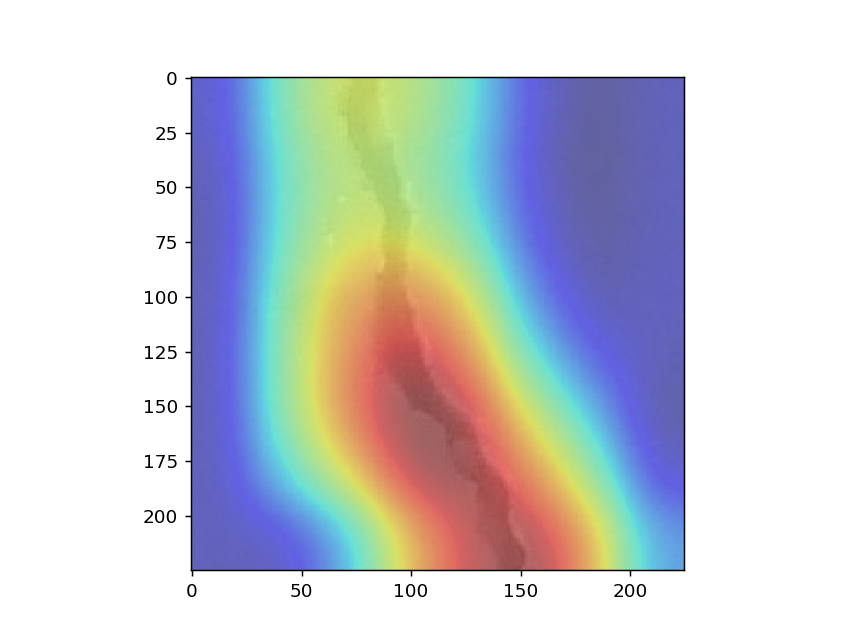

In [24]:
train_img_size_h = 227
train_img_size_w = 227
# check the prediction for 10 test images
for idx in range(1):   
    # get the feature map of the test image
    features_for_one_img = features[idx, :, :, :]

    # map the feature map to the original size
    height_roomout = train_img_size_h / features_for_one_img.shape[0]
    width_roomout = train_img_size_w / features_for_one_img.shape[1]
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
        
    # get the predicted label with the maximum probability
    pred = np.argmax(results[idx])
    
    # prepare the final display
    plt.figure(facecolor='white')
    
    # get the weights of class activation map
    cam_weights = gap_weights[:, pred]

    # create the class activation map
    cam_output = np.dot(cam_features, cam_weights)
    
    # draw the class activation map
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    
    #buf = 'Predicted Class = ' + fashion_name[pred] + ', Probability = ' + str(results[idx][pred])
    #buf = 'Probability = ' + str(results[idx][pred])

    #buf = 'test'
    #plt.xlabel(buf)
    
    plt.imshow(img, alpha=0.5)
    plt.imshow(cam_output, cmap='jet', alpha=0.5)
     
    plt.show()  

In [ ]:
features.shape

In [ ]:
x[0].shape

In [ ]:
x[0]

In [ ]:
plt.imshow(x[0], alpha=0.5)
plt.show()